# Solusi Numerik untuk Sistem Persamaan Linear

Suatu sistem persamaan linear (SPL) adalah kumpulan dari sejumlah $n$ persamaan atau secara matematis dapat ditulis

$$
\begin{array}{cc}
E_1: & a_{11}x_1 + a_{12}x_2 + \cdots + a_{1n}x_n = b_1, \\
E_2: & a_{21}x_1 + a_{22}x_2 + \cdots + a_{2n}x_n = b_2, \\
E_3: & a_{31}x_1 + a_{32}x_2 + \cdots + a_{3n}x_n = b_3, \\
    & \vdots \\
E_n: & a_{n1}x_1 + a_{n2}x_2 + \cdots + a_{nn}x_n = b_n, \\
\end{array}
(1)
$$

Di dalam (1), terdapat koefisien $a_{ij}$, untuk $i,j = 1,2, \cdots, n$, dan $b_i$, dan kita perlu untuk mencari unknowns $x_1, x_2,\cdots, x_n$. SPL (1) juga dapat ditulis dalam bentuk matriks-vektor yaitu

$$A\textbf{x} = \textbf{b},$$

dimana $A \in \mathbb{R}^{n \times n}$, $\textbf{x} \in \mathbb{R}^n$, dan $\textbf{b} \in \mathbb{R}^n$.

Terdapat dua cara untuk menyelesaikan (1) menggunakan solusi numerik:
1. Metode Langsung (Naive) (fokus pada analisa error pembulatan)
2. Metode Iteratif

Selain mencari $\vec{x}$, permasalahan yang ada di dalam SPL meliputi:
1. Determinan dari matriks
2. Invers dari matriks
3. Tipe-tipe khusus dari matriks:
  * Matriks Definit Positif
  * Matriks Tridiagonal

Beberapa metode yang akan dipelajari antara lain:
1. Eliminasi Gauss
2. Partial Pivoting
3. Faktorisasi Matriks
  * Dekomposisi LU
  * Matriks Permutasi
  * Cholesky
  * Faktorisasi Crout

## Sistem Persamaan Linear

Kita menggunakan tiga operasi baris untuk menyederhanakan SPL (1):
1. Persamaan $E_i$ dapat __dikali__ oleh suatu konstanta $\lambda$ yang __tak nol__,yang hasilnya ditempatkan di $E_i$. Operasi tersebut dinotasikan sebagai $(\lambda E_i) \rightarrow (E_i)$.
2. Persamaan $E_j$ dapat __dikali__ oleh suatu konstanta $\lambda$ dan __ditambahkan__ ke persamaan $E_i$, yang hasilnya ditempatkan di $E_i$. Operasi ini dapat dinotasikan sebagai $(E_i + \lambda E_j) \rightarrow (E_i)$.
3. Persamaan $E_i$ dan $E_j$ dapat __ditukar__ urutannya atau dapat ditulis $(E_i) \leftrightarrow (E_j)$.

### Contoh 1:
Diberikan SPL

$$
\begin{array}{cc}
E_1: & x_1 &+& x_2 &&  &+& 3x_4 &=& 4, \\
E_2: & 2x_1 &+& x_2 &-& x_3 &+& x_4 &=& 1, \\
E_3: & 3x_1 &-& x_2 &-& x_3 &+& 2x_4 &=& -3, \\
E_4: & -x_1 &+& 2x_2 &+& 3x_3 &-& x_4 &=& 4. \\
\end{array}
$$

Tujuannya adalah mencari nilai dari $x_1, x_2, x_3$, dan $x_4$.

Pertama, kita eliminasi $x_1$ dari persamaan $E_2, E_3$, dan $E_4$ dengan cara:
* $(E_2-2E_1)\rightarrow(E_2)$
* $(E_3-3E_1)\rightarrow(E_3)$
* $(E_4+E_1)\rightarrow(E_4)$

akan menghasilkan sistem persamaan baru

$$
\begin{array}{cc}
E_1: & x_1 &+& x_2 &&  &+& 3x_4 &=& 4, \\
E_2: &  &-& x_2 &-& x_3 &-& 5x_4 &=& -7, \\
E_3: &  &-& 4x_2 &-& x_3 &-& 7x_4 &=& -15, \\
E_4: &  && 3x_2 &+& 3x_3 &+& 2x_4 &=& 8. \\
\end{array}
$$

Di dalam sistem persamaan baru ini, kemudian, kita eliminasi $x_2$ dari $E_3$ dan $E_4$ dengan cara:
* $(E_3-4E_2)\rightarrow(E_3)$
* $(E_4+3E_2)\rightarrow(E_4)$,

sehingga menghasilkan

$$
\begin{array}{cc}
E_1: & x_1 &+& x_2 &&  &+& 3x_4 &=& 4, \\
E_2: &  &-& x_2 &-& x_3 &-& 5x_4 &=& -7, \\
E_3: &  && &-& 3x_3 &+& 13x_4 &=& 13, \\
E_4: &  && &&  &-& 13x_4 &=& -13. \\
\end{array}
(2)
$$

SPL (2) sudah menjadi __bentuk tereduksi__ dan untuk mencari nilai unknowns tersebut digunakan proses __subtitusi mundur__. Karena $E_4$ bernilai $x_4 = 1$, kita selesaikan $E_3$ untuk mencari $x_3$

$$
x_3 = \frac{1}{3}(13-13x_4) = \frac{1}{3}(13-13) = 0.
$$

Dilanjutkan untuk $E_2$

$$
x_2 = -(-7 + 5x_4 + x_3) = -(-7 + 5 + 0) = 2,
$$

dan $E_1$

$$
x1 = 4 - 3x_4 - x_2 = 4 - 3 - 1 = -1.
$$

Jadi solusinya adalah $x_1 = -1, x_2 = 2, x_3 = 0$, dan $x_4 = 1$.

## Desain Algoritma untuk Eliminasi Gauss
Agar dapat mempermudah pengimplementasiannya ke dalam bahasa pemrograman, SPL(1) diubah ke dalam bentuk augmented, 

$$
\begin{array}{cc}
E_1: & a_{11}x_1 + a_{12}x_2 + \cdots + a_{1n}x_n = a_{1,n+1}, \\
E_2: & a_{21}x_1 + a_{22}x_2 + \cdots + a_{2n}x_n = a_{2,n+1}, \\
E_3: & a_{31}x_1 + a_{32}x_2 + \cdots + a_{3n}x_n = a_{3,n+1}, \\
    & \vdots \\
E_n: & a_{n1}x_1 + a_{n2}x_2 + \cdots + a_{nn}x_n = a_{n,n+1}, \\
\end{array}
(3)
$$

atau dapat ditulis dalam bentuk augmented matrix $C$

$$
C = 
\begin{bmatrix}
  a_{11} & a_{12} & \cdots & a_{1n} & a_{1,n+1} \\
  a_{21} & a_{22} & \cdots & a_{2n} & a_{2,n+1} \\
   &  & \vdots &  &  \\
  a_{n1} & a_{n2} & \cdots & a_{nn} & a_{n,n+1} \\
\end{bmatrix}
$$

Untuk menyelesaikan SPL tersebut, kita gunakan Eliminasi Gauss yang desain algoritmanya adalah sebagai berikut:
1. Buat sistem segitiga atas menggunakan eliminasi maju.
  * Kita lakukan eliminasi $x_1$ dari persamaan $E_2$, $E_3$, $E_4, ..., E_n$ menghasilkan SPL baru, lakukan eliminasi $x_2$ dari persamaan $E_3, E_4, ..., E_n$, dst. sampai $x_{n-1}$ dari persamaan $E_n$ atau dapat ditulis dalam bentuk algoritma
    ``` python
    for i=1 to n
        for j=i+1 to n
            (E_j) <- (E_j) - (a_{ji}/a_{ii})*(E_i)
    ```
Maka algoritma ini akan menghasilkan sistem segitiga atas

$$
\begin{array}{cc}
E_1: & a_{11}x_1 &+& a_{12}x_2 &+& \cdots &+& a_{1n}x_n &=& a_{1,n+1}, \\
E_2: &  && a_{22}x_2 &+& \cdots &+& a_{2n}x_n &=& a_{2,n+1}, \\
&&&&&&& \vdots& \\
E_n: &  && &&  &+& a_{nn}x_n &=& a_{n,n+1}. \\
\end{array}
(4)
$$

Catatan bahwa nilai dari koefisien $a_{i,j+1}$ di (4) berbeda dari (3).

2. Subtitusi mundur
  * Lakukan subtitusi mundur untuk mendapatkan solusinya.
  ```python
  x_n = a_{n, n+1} / a_{nn}
  for i = n-1 to 1
      x_i = 1/a_{ii} (a_{i, n+1} - sum(a_{ij}*x_j))
  ``` 

In [14]:
function eliminasi_gauss(A, b)
    A_c = hcat(A, b)
    
    # jumlah baris dari A
    n = size(A_c, 1)
    
    # eliminasi maju
    for i in 1:n-1
        pivot = A_c[i, i]
        for j in i+1:n
            faktor = A_c[j, i] / pivot
            A_c[j, :] -= faktor .* A_c[i, :]
        end
    end
    
    # subtitusi mundur
    b = A_c[:, end]
    b[end] /= A_c[end, end-1]
    for i in n-1:-1:1
        pivot = A_c[i, i]
        b[i] -= sum(A_c[i, i+1:end-1] .* b[i+1:end])
        b[i] /= pivot
    end
    
    return b
end

eliminasi_gauss (generic function with 1 method)

### Contoh 2

$$
\begin{array}{cc}
E_1: & 10^{-17}x_1 &-& x_2 &=& -1, \\
E_2: & x_1 &+& 2x_2 &=& 3, \\
\end{array}
$$

In [17]:
A = [1e-17 -1; 1 2]
b = [-1; 3]
sol = eliminasi_gauss(A, b)

2-element Vector{Float64}:
 0.0
 1.0

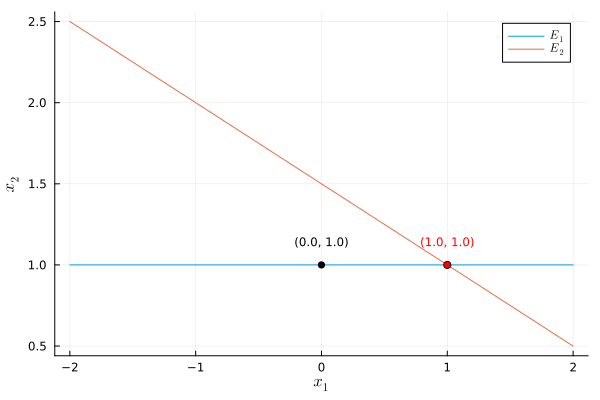

In [51]:
# plot SPL
using Plots
using LaTeXStrings

x = LinRange(-2., 2., 100)
f1(x) = 1 .+ 1e-17 .* x
f2(x) = (3 .- x) ./ 2

plot(x, f1(x), label=L"E_1", xlabel=L"x_1", ylabel=L"x_2")
plot!(x, f2(x), label=L"E_2")

# solusi eliminasi
scatter!((sol[1], sol[2]), markershape=:circle, markercolor=:black, label="")
annotate!([(sol[1], sol[2]+0.1, ("($(sol[1]), $(sol[2]))", 8, 0.0, :bottom, :black))])

# solusi eksak
scatter!((1, 1), markershape=:circle, markercolor=:red, label="")
annotate!([(1, 1+0.1, ("(1.0, 1.0)", 8, 0.0, :bottom, :red))])

In [55]:
using LinearAlgebra

condition_number = cond(A) # Condition Number A
determinan = det(A)

print("condition number A: $(condition_number), |A| = $(determinan)")

condition number A: 5.828427124746189, |A| = 1.0

Dari Contoh 2 terlihat bahwa condition number dari A adalah 5.8284 mengindikasikan bahwa matriks tersebut __ill-condition__ atau _hampir_ __singular__. Matriks yang ill-condition dapat terjadi karena error pembulatan, sehingga solusi numerik yang dihasilkan salah. Walaupun kita tahu bahwa determinan dari A tak nol artinya SPL pada Contoh 2 memiliki solusi tunggal.

> If the condition number is not too much larger than one, the matrix is well-conditioned, which means that its inverse can be computed with good accuracy. If the condition number is very large, then the matrix is said to be ill-conditioned. Practically, such a matrix is almost singular, and the computation of its inverse, or solution of a linear system of equations is prone to large numerical errors. A matrix that is not invertible has condition number equal to infinity. [](https://en.wikipedia.org/wiki/Condition_number)